# Digit_Recognition using CNN on MNIST dataset 

Several machine learning models have been used to classify digits including Linear Classifiers,K-Nearest Neighbors,Boosted Stumps,Non-Linear Classifiers,SVMs,Neural Nets.Bust the best accuracy has been achieved by using the CNN models. Here I have used keras and tensorflow to create a simle dounled layered CNN with 3 more FLs. The model has achieved an accuracy of 99.04000163078308% on the test set.

In [ ]:
# import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
# the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

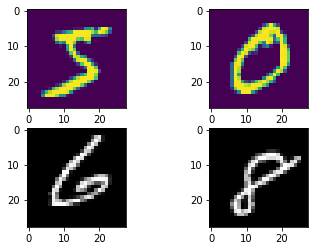

In [41]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(x_train[0])
plt.subplot(222)
plt.imshow(x_train[1])
plt.subplot(223)
plt.imshow(x_train[59998], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[59999], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [42]:
# Reshaping the array to 4-dims so that it can work with the Keras API(for extra info refer to the keras documentation)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [43]:
# Normalizing the RGB valurs by dividing by the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [44]:
num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [45]:
#import keras modules
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras import backend as K

In [46]:
#we can play around with the hyperparameters to see the effect of their change
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flattening the 2D arrays for fully connected layers
model.add(Flatten()) 
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [47]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
#Adam() may also be used as optimiser, in the original LeNet5 paper Adam optimiser was used

In [48]:
batch_size = 128
epochs = 10
hist = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has been succefully trained.")

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 25s 411us/step - loss: 0.2249 - accuracy: 0.9313 - val_loss: 0.0664 - val_accuracy: 0.9793
Epoch 2/10
60000/60000 [==============================] - 25s 422us/step - loss: 0.0672 - accuracy: 0.9797 - val_loss: 0.0431 - val_accuracy: 0.9859
Epoch 3/10
60000/60000 [==============================] - 23s 391us/step - loss: 0.0485 - accuracy: 0.9851 - val_loss: 0.0346 - val_accuracy: 0.9880
Epoch 4/10
60000/60000 [==============================] - 25s 415us/step - loss: 0.0367 - accuracy: 0.9882 - val_loss: 0.0334 - val_accuracy: 0.9890
Epoch 5/10
60000/60000 [==============================] - 26s 441us/step - loss: 0.0303 - accuracy: 0.9904 - val_loss: 0.0284 - val_accuracy: 0.9904
Epoch 6/10
60000/60000 [==============================] - 25s 413us/step - loss: 0.0255 - accuracy: 0.9920 - val_loss: 0.0380 - val_accuracy: 0.9881
Epoch 7/10
60000/60000 [==============================] 

In [49]:
model.evaluate(x_test, y_test)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 2s 162us/step
Test loss: 0.03200948908796604
Test accuracy: 0.9904000163078308


The number predicted is :  9


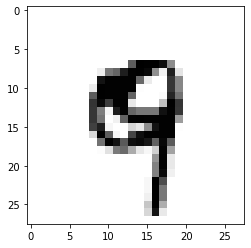

In [50]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print('The number predicted is : ', pred.argmax())